In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.linear_model import LinearRegression

In [5]:
# Import the data
tree = pd.read_csv('tree.csv')
vert_genes = pd.read_csv('vert_genes.csv')

In [6]:
# Create a directed graph
G = nx.DiGraph()
for _, row in tree.iterrows():
    if not pd.isna(row['Parent']):
        G.add_edge(int(row["Parent"]), int(row["Child"]), time = row["t"])

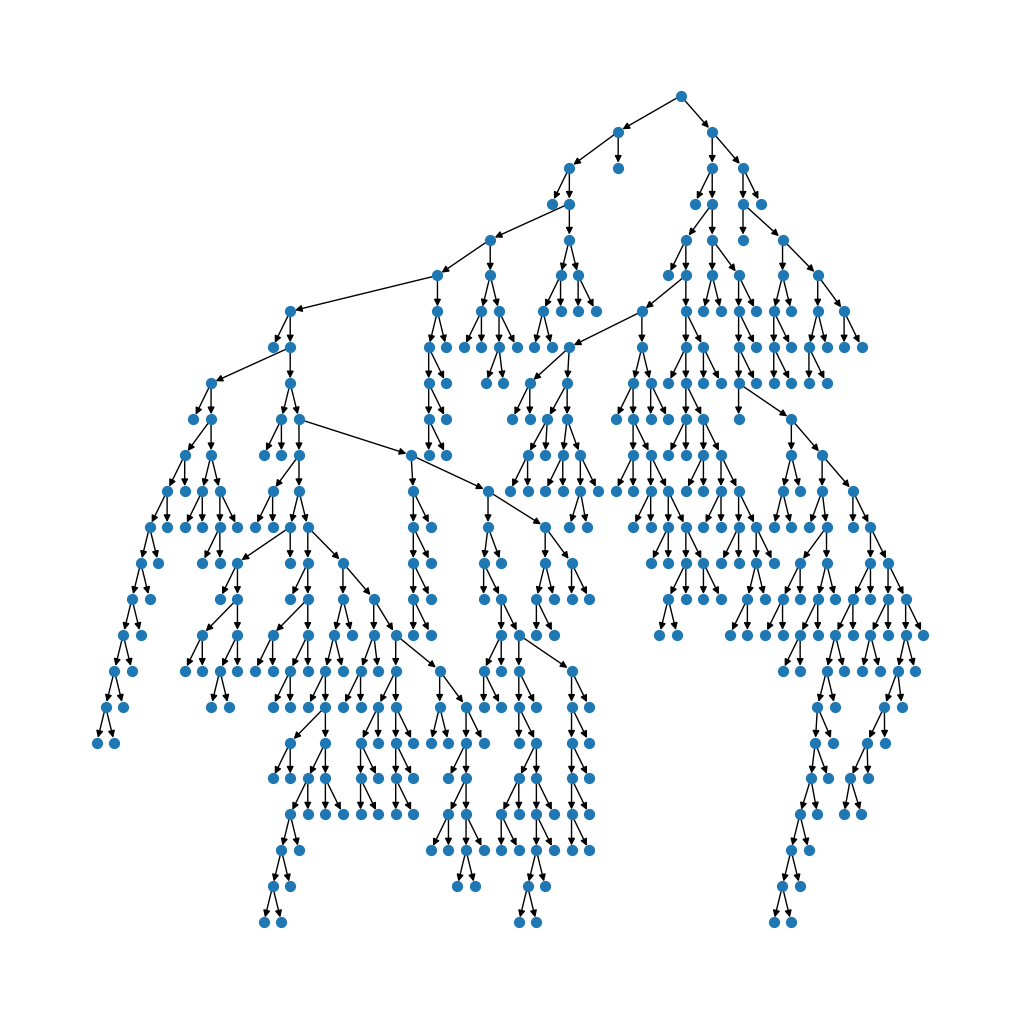

In [7]:
# Plot the graph as a top-down tree
plt.figure(figsize=(10, 10))
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=False, node_size = 50)
plt.show()


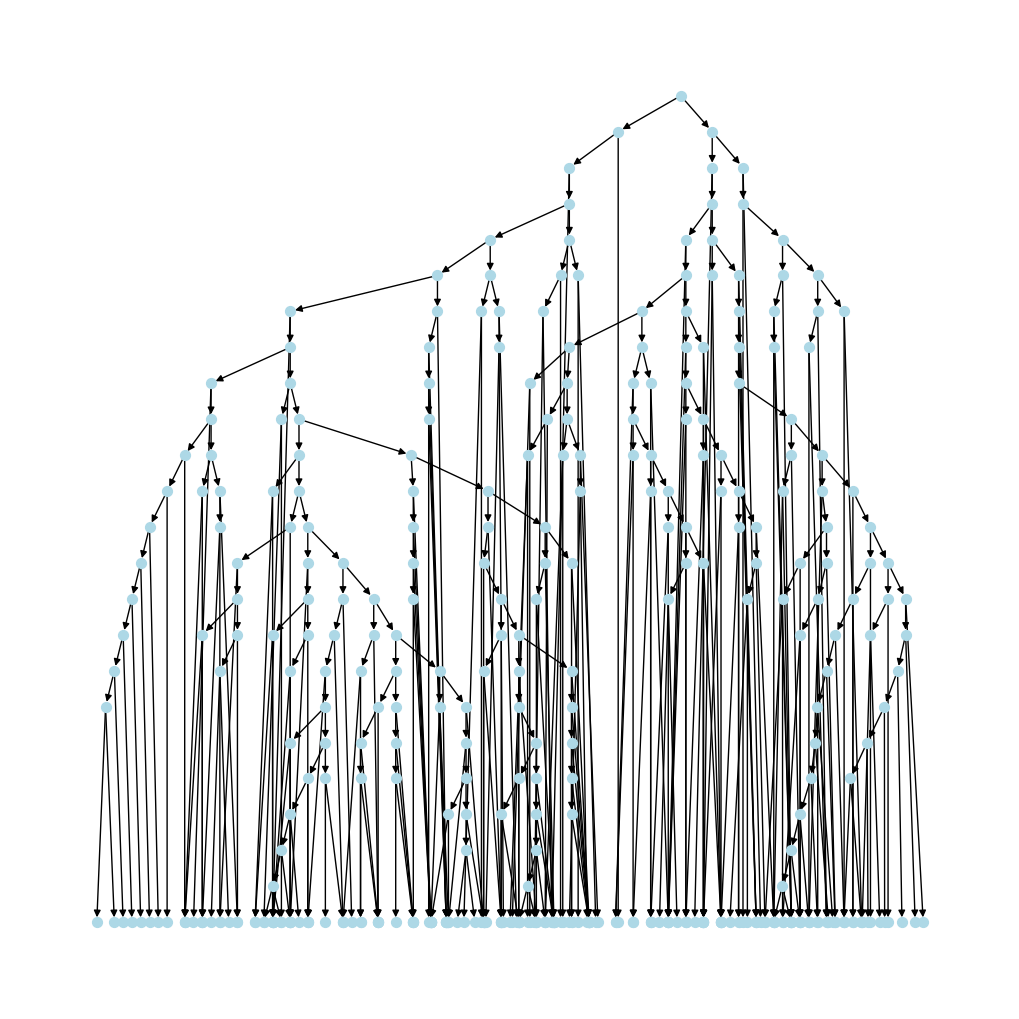

In [8]:
# Get initial layout
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

# Find leaf nodes (nodes with no outgoing edges)
leaves = [node for node in G.nodes if G.out_degree(node) == 0]

# Find minimum depth of the tree
min_depth = min(pos[node][1] for node in pos)  # Highest Y value

# Adjust leaf positions to be at min_depth
for leaf in leaves:
    pos[leaf] = (pos[leaf][0], min_depth)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=50, node_color="lightblue", edge_color="black")
plt.show()

In [29]:
# Parameters
alpha_0 = 50000
alpha = 0.5
sigma_0_sq = 5000
sigma_sq = 2500
beta = 0.8

simulated_lengths = {}

# Simulate length of root node
root = 407
simulated_lengths[root] = np.random.normal(alpha_0, (sigma_0_sq))

# Function to simulate the length of a node
def simulate_node_length(parent):
    for child in G.successors(parent):
        t = G[parent][child]['time']
        mean = alpha * t + beta * simulated_lengths[parent]
        variance = sigma_sq * t
        simulated_lengths[child] = np.random.normal(mean, np.sqrt(variance))
        simulate_node_length(child)
        
simulate_node_length(root)

print(simulated_lengths)

{407: 53453.47196747681, 205: 42754.39830091637, 318: 34239.61248838757, 193: 26765.88659650496, 319: 27405.210324292868, 320: 21919.551995102436, 321: 17453.173075736962, 114: 14168.712502424067, 115: 14064.338570577931, 322: 17567.606595539768, 152: 13676.030219868817, 323: 14044.28341647046, 151: 10673.665414039868, 324: 11208.986640343544, 150: 8767.902852426403, 325: 8911.57405253792, 149: 7598.406520373516, 326: 6870.690836842639, 327: 5539.043443782992, 328: 4559.519306194356, 123: 3723.3976966592595, 329: 3678.5653563089754, 330: 2804.9351845983897, 118: 2301.015857590677, 331: 2057.9449948639044, 116: 1524.732831771876, 117: 1534.3722023159926, 332: 3004.5054428462868, 122: 2730.357774504317, 333: 2191.61430257494, 121: 1697.9529843367577, 334: 1798.9188249738872, 119: 1289.041395286038, 120: 1435.326410253094, 335: 4483.768646121766, 145: 4194.434039441525, 336: 3550.566362072154, 337: 2834.246928432608, 134: 2058.4129597694964, 338: 2340.8854752597686, 133: 2010.821127790795

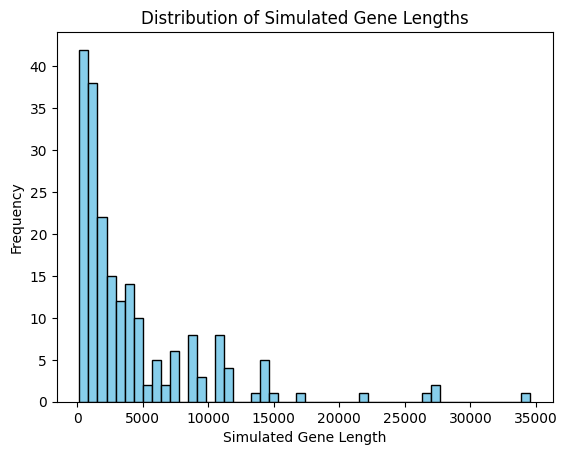

In [30]:
# Extract leaf node lengths (X_i)
leaf_nodes = [node for node in G.nodes if G.out_degree(node) == 0]
simulated_x = [simulated_lengths[node] for node in leaf_nodes]

# Plot histogram of simulated gene lengths
plt.hist(simulated_x, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Simulated Gene Length")
plt.ylabel("Frequency")
plt.title("Distribution of Simulated Gene Lengths")
plt.show()
